# Dataset
The following categorical variables have been encoded into numberic ordinal scale:

- Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

- RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

# Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

# Load data


In [22]:
#Read CSV
df = pd.read_csv('hr_attrition_data.csv')
# Add colums with categorical variables but replacing Values by 1 and 0
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Gender_Flag'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['OverTime_Flag'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition_Flag'] = df['Attrition_Flag'].astype('int64')
df['Gender_Flag'] = df['Gender_Flag'].astype('int64')
df['OverTime_Flag'] = df['OverTime_Flag'].astype('int64')


In [23]:
#Show first 5 data entries
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Flag,Gender_Flag,OverTime_Flag
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,0,0


In [24]:
# Find duplicate rows based EmployeeCount, Over18 and StandardHours
duplicate = df[df.duplicated(['EmployeeCount', 'Over18', 'StandardHours'])]
print("Duplicate Rows based on EmployeeCount, Over18, StandardHours :")
duplicate[['EmployeeCount', 'Over18', 'StandardHours']].head(5)
 

Duplicate Rows based on EmployeeCount, Over18, StandardHours :


,EmployeeCount,Over18,StandardHours
1,1,Y,80
2,1,Y,80
3,1,Y,80
4,1,Y,80
5,1,Y,80


In [25]:
# Count duplicate rows based EmployeeCount, Over18 and StandardHours
print("Duplicate Rows:")
duplicate[['EmployeeCount', 'Over18', 'StandardHours']].shape[0]

Duplicate Rows:


1469

# Preprocessing

In [26]:
# Remove columns with duplicated rows and remove 'Attrition','Gender', 'OverTime'
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','Attrition','Gender', 'OverTime'], axis="columns", inplace=True)


In [27]:
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Attrition_Flag      

In [28]:
df['Attrition_Flag'] = df['Attrition_Flag'].astype('int64')
print(df['Attrition_Flag'].value_counts(normalize=False))
print(df['Attrition_Flag'].value_counts(normalize=True))

Attrition_Flag
0    1233
1     237
Name: count, dtype: int64
Attrition_Flag
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [29]:
# Crosstabs by categorical vars

for col in df.select_dtypes(object).columns:
    print(pd.crosstab(df[col],
                      df['Attrition_Flag'],
                      normalize='index'
                      ).round(2).sort_values(by=1,  ascending=False),
          end='\n\n')

Attrition_Flag        0     1
BusinessTravel               
Travel_Frequently  0.75  0.25
Travel_Rarely      0.85  0.15
Non-Travel         0.92  0.08

Attrition_Flag             0     1
Department                        
Sales                   0.79  0.21
Human Resources         0.81  0.19
Research & Development  0.86  0.14

Attrition_Flag       0     1
EducationField              
Human Resources   0.74  0.26
Technical Degree  0.76  0.24
Marketing         0.78  0.22
Life Sciences     0.85  0.15
Medical           0.86  0.14
Other             0.87  0.13

Attrition_Flag                0     1
JobRole                              
Sales Representative       0.60  0.40
Laboratory Technician      0.76  0.24
Human Resources            0.77  0.23
Sales Executive            0.83  0.17
Research Scientist         0.84  0.16
Healthcare Representative  0.93  0.07
Manufacturing Director     0.93  0.07
Manager                    0.95  0.05
Research Director          0.98  0.02

Attrition_Flag     0 

# Decision Tree

## Training and Testing Dataset

In [30]:
# 'Attrition' is the target variable and others are predictors
X = df.drop('Attrition_Flag', axis=1)  # Features
y = df['Attrition_Flag']  # Target variable

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("TRAINING SET")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
print('Employees Attrition yes:{:.5f}%'.format(y_train.mean()*100),'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
print('Employees Attrition yes:{:.5f}%'.format(y_test.mean()*100))

TRAINING SET
X:  (1176, 44)
y:  (1176,)
Employees Attrition yes:16.83673% 

TEST SET
X:  (294, 44)
y:  (294,)
Employees Attrition yes:13.26531%


## Create and Evaluate Model Accuracy

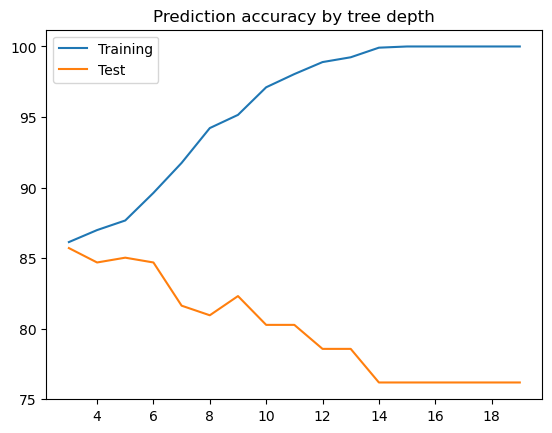

In [31]:
DeTreeClass = {}
y_pred_train = {}
y_pred_test = {}
accuracies_train = {}
accuracies_test = {}

for tree_depth in range(3,20):
    # Model training
    DeTreeClass[tree_depth] = DecisionTreeClassifier(max_depth = tree_depth,
                               criterion = "entropy",
                               random_state = 42).fit(X_train, y_train)

    # Prediction and evaluation on the training set
    y_pred_train[tree_depth] = DeTreeClass[tree_depth].predict(X_train)
    accuracies_train[tree_depth] = accuracy_score(y_train, y_pred_train[tree_depth])*100

    # Prediction and evaluation on the test set
    y_pred_test[tree_depth] = DeTreeClass[tree_depth].predict(X_test)
    accuracies_test[tree_depth] = accuracy_score(y_test, y_pred_test[tree_depth])*100

accuracies_df = pd.DataFrame( {'Training':accuracies_train,
                           'Test': accuracies_test})

accuracies_df.plot.line(
    title ='Prediction accuracy by tree depth')
plt.show()

In [32]:
accuracies_df.head(10)

,Training,Test
3,86.139456,85.714286
4,86.989796,84.693878
5,87.670068,85.034014
6,89.625850,84.693878
7,91.751701,81.632653
8,94.217687,80.952381
9,95.153061,82.312925
10,97.108844,80.272109
11,98.044218,80.272109
12,98.894558,78.571429


In [33]:
#Select Optimal Tree Depth
optimal_depth = accuracies_df['Test'].idxmax()
optimal_depth

np.int64(3)

Acurracy in Training Set: 100.00%
Acurracy in Testing Set: 100.00%
Tree Depth: 3

Confusion Matrix:


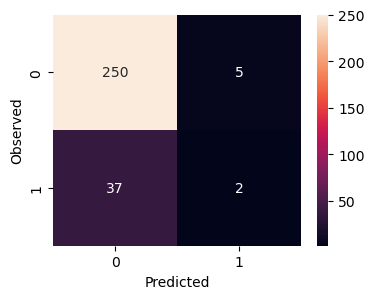

In [ ]:
# Create and train optimal decision tree model
dt_model = DecisionTreeClassifier(max_depth=optimal_depth,  criterion="entropy", random_state=42)  # Example with max_depth=5
dt_model.fit(X_train, y_train)

# Predict on the train set
y_pred_train = dt_model.predict(X_train)
# Model Accuracy Evaluation
accuracy_train = accuracy_score(y_pred_train, y_pred_train)*100
print("Acurracy in Training Set: {:4.2f}%".format(accuracy_train))

# Predict on the test set
y_pred_test = dt_model.predict(X_test)
# Model Accuracy Evaluation
accuracy_test = accuracy_score(y_pred_test, y_pred_test)*100
print("Acurracy in Testing Set: {:4.2f}%".format(accuracy_test))


# Display the model report
print("Tree Depth: {}".format(dt_model.get_depth()))

# Calculate the confusion matrix
data = {'y_observed':y_test, 'y_predicted':y_pred_test}
conf_df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(conf_df['y_observed'],conf_df['y_predicted'],
                               rownames=['Observed'], colnames=['Predicted'])

print("\nConfusion Matrix:")

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

## Decision Tree Visualization

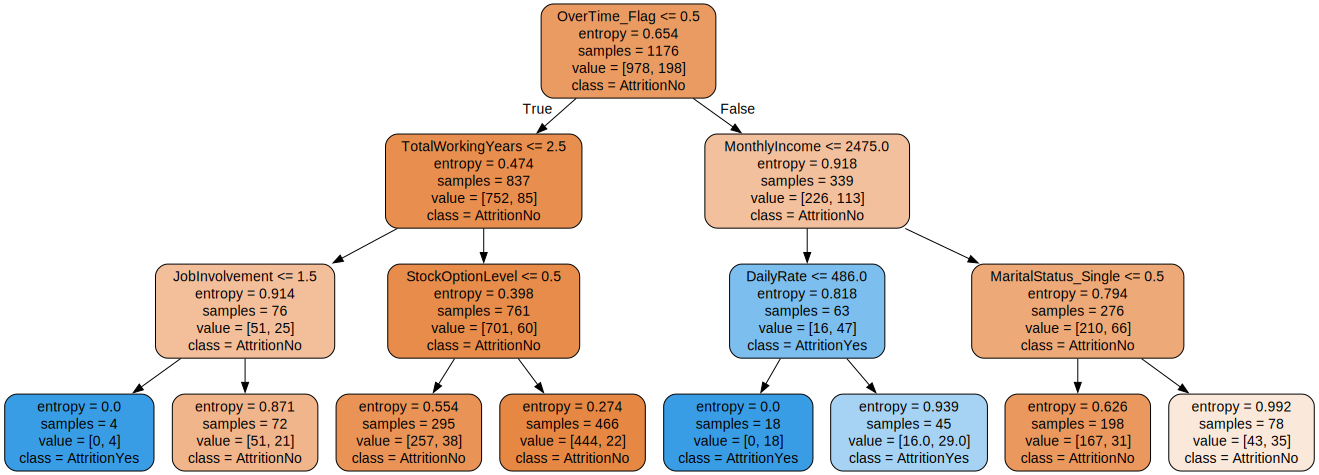

In [39]:
## Decision Tree Visualization
dot_data = export_graphviz(dt_model, feature_names=X.columns,
                           class_names=['AttritionNo','AttritionYes'],
                           max_depth = optimal_depth,
                           rounded = True,
                           filled = True,
                           )

graph =  graphviz.Source(dot_data, format='png')

graph.render('Decision Tree')              # guarda el archivo .dot y la gráfica png
graph

## Feature Importance 

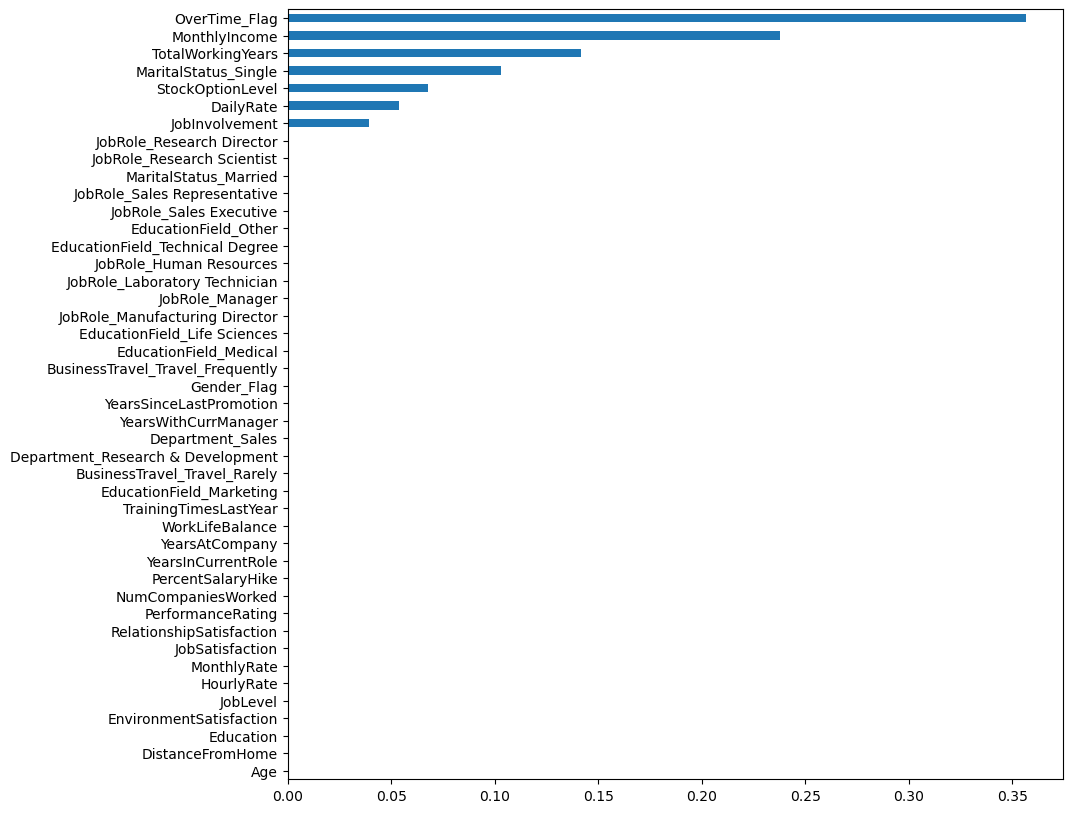

In [40]:
# Feature Importance
feature_importance = pd.Series(dt_model.feature_importances_,
                    index=X.columns.values)

feature_importance.sort_values().plot(kind = 'barh',figsize=(10, 10))
plt.show()

## Confusion matrix and reduce error in AttritionYes Prediction

In [42]:
# Attrition Probability
pd.DataFrame(dt_model.predict_proba(X_test), columns=['AttritionNo', 'AttritionYes']).head(20)

,AttritionNo,AttritionYes
0,0.871186,0.128814
1,0.952790,0.047210
2,0.000000,1.000000
3,0.952790,0.047210
4,0.871186,0.128814
5,0.843434,0.156566
6,0.871186,0.128814
7,0.952790,0.047210
8,0.871186,0.128814
9,0.708333,0.291667



Confusion Matrix:


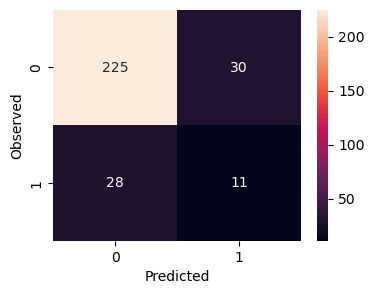

In [55]:
#Confusion Matrix
cutoff = 0.18 # cutoff for classification as AtrittionYes  
y_pred_test_cut = np.where( dt_model.predict_proba(X_test)[:, 1] > cutoff, 1, 0)
# Calculate the confusion matrix
data = {'y_observed':y_test, 'y_predicted':y_pred_test_cut}
conf_df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(conf_df['y_observed'],conf_df['y_predicted'],
                               rownames=['Observed'], colnames=['Predicted'])

print("\nConfusion Matrix:")

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()


# Random Forest
